<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes</em><br>

</div>

### Análisis de Datos: Tarea 01
#### Integrantes: 
` Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

#### 1. Importación de Librerias

In [148]:
import pandas as pd               #Manejo de datos en Tablas
import numpy as np
import matplotlib.pyplot as plt   #Creación de visualizaciones 
import seaborn as sns             #Creación de visualizaciones  
import missingno as msgn          #Visualizacion de NaNs 
from sklearn.preprocessing import MinMaxScaler #Para Normalizar la data
from sklearn.preprocessing import StandardScaler #Para Estandarizar la data

sns.set_theme() #inicializacion de tematica de seaborn

#### 2. Lectura de archivo

In [150]:
# Ruta relativa al archivo
ruta_archivo = r'.\Data\2023-03-08 Precios Casas RM.csv'
df = pd.read_csv(ruta_archivo)
df.columns = df.columns.str.replace(' ', '_') # Normalizar los nombres
df.columns = df.columns.str.lower()
# Mostrar las primeras filas del DataFrame
df.head(10)

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id,realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades
5,94000000,2641,117061,EstaciónCentral,Avenida5deAbril,2,1.0,72.0,131.0,NaN,7586371,Patricio Gajardo propiedades
6,75000000,2107,93400,Colina,GabrielaMistral/PabloNeruda,3,1.0,70.0,80.0,2.0,11688480,Patricio Gajardo propiedades
7,105000000,2950,130760,LaFlorida,SanCristóbalTres,2,1.0,50.0,120.0,1.0,12229303,Gesinprop Gestión Inmobiliaria
8,76000000,2135,94645,Maipú,PasajeJosédeMoraleda,3,1.0,72.0,72.0,1.0,12223374,Gesinprop Gestión Inmobiliaria
9,76000000,2135,94645,Maipú,Matías,3,1.0,46.0,90.0,1.0,12221068,Gesinprop Gestión Inmobiliaria


#### 3. Análisis exploratorio

In [152]:
# Recopilación de información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_clp   7779 non-null   int64  
 1   price_uf    7779 non-null   int64  
 2   price_usd   7779 non-null   int64  
 3   comuna      7779 non-null   object 
 4   ubicacion   7779 non-null   object 
 5   dorms       7779 non-null   int64  
 6   baths       7714 non-null   float64
 7   built_area  7533 non-null   float64
 8   total_area  7571 non-null   float64
 9   parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [153]:
# Resumen estadistico de las variables numericas
df.describe()

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [154]:
# Dimensiones del df
df.shape

(7779, 12)

In [155]:
# Total de elementos únicos por cada columna.
df.nunique()

price_clp     1897
price_uf      1801
price_usd     1877
comuna          51
ubicacion     6620
dorms           22
baths           15
built_area     573
total_area    1099
parking         26
id            7778
realtor        278
dtype: int64

### 4. Limpieza de datos
##### 4.1. Verificamos nombre de comunas.

In [157]:
# Obtener el listado único de comunas
comunas_unicas = df['comuna'].unique()

# Ordenar alfabéticamente para facilitar la revisión
comunas_unicas.sort()

# Mostrar el listado de comunas únicas
print("Listado de comunas únicas:")
print(comunas_unicas)

Listado de comunas únicas:
['Buin' 'CaleradeTango' 'Cerrillos' 'CerroNavia' 'Colina' 'Conchalí'
 'Curacaví' 'ElBosque' 'ElMonte' 'EstaciónCentral' 'Huechuraba'
 'Independencia' 'IsladeMaipo' 'LaCisterna' 'LaFlorida' 'LaGranja'
 'LaPintana' 'LaReina' 'Lampa' 'LasCondes' 'LoBarnechea' 'LoEspejo'
 'LoPrado' 'Macul' 'Maipú' 'MaríaPinto' 'Melipilla' 'PadreHurtado' 'Paine'
 'PedroAguirreCerda' 'Peñaflor' 'Peñalolén' 'Pirque' 'Providencia'
 'Pudahuel' 'PuenteAlto' 'Quilicura' 'QuintaNormal' 'Recoleta' 'Renca'
 'SanBernardo' 'SanJoaquín' 'SanJosédeMaipo' 'SanMiguel' 'SanPedro'
 'SanRamón' 'Santiago' 'Talagante' 'Tiltil' 'Vitacura' 'Ñuñoa']


##### 4.2. Busqueda de Valores Nulos

In [159]:
# Filtrar y mostrar las filas con NaN
nan_rows = df[df.isna().any(axis=1)]
print("Listado de filas con NaN:")
nan_rows.head(10)

Listado de filas con NaN:


,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id,realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
5,94000000,2641,117061,EstaciónCentral,Avenida5deAbril,2,1.0,72.0,131.0,NaN,7586371,Patricio Gajardo propiedades
14,199000000,5591,247821,Santiago,Cuevas,7,3.0,162.0,185.0,NaN,12155606,Todo Propiedades
15,79000000,2220,98381,PuenteAlto,PasajeLagoBertrand,2,1.0,NaN,NaN,2.0,12149041,Fe Propiedades Spa
16,373695000,10500,465374,LaFlorida,JoséMiguelCarrera,7,3.0,173.0,850.0,3.0,7850911,NaN
18,142000000,3990,176837,Santiago,Sandaniel,3,2.0,100.0,163.0,2.0,12065162,NaN
21,1210060000,34000,1506924,LasCondes,Laforesta,5,5.0,360.0,1150.0,4.0,10080545,NaN
24,75000000,2107,93400,Quilicura,Riocachapoal,2,2.0,70.0,78.0,NaN,11426067,Propital
25,50000000,1405,62267,PuenteAlto,CerroParedones,3,1.0,31.0,73.0,NaN,11988681,Cgs Corretaje Inmobiliario Spa
26,175000000,4917,217933,Santiago,RíoTrancura,3,3.0,94.0,191.0,4.0,11840169,NaN


In [160]:
# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()
print("Valores NaN por columna:")
print(nan_count)

Valores NaN por columna:
price_clp        0
price_uf         0
price_usd        0
comuna           0
ubicacion        0
dorms            0
baths           65
built_area     246
total_area     208
parking       2290
id               0
realtor        595
dtype: int64


<Axes: >

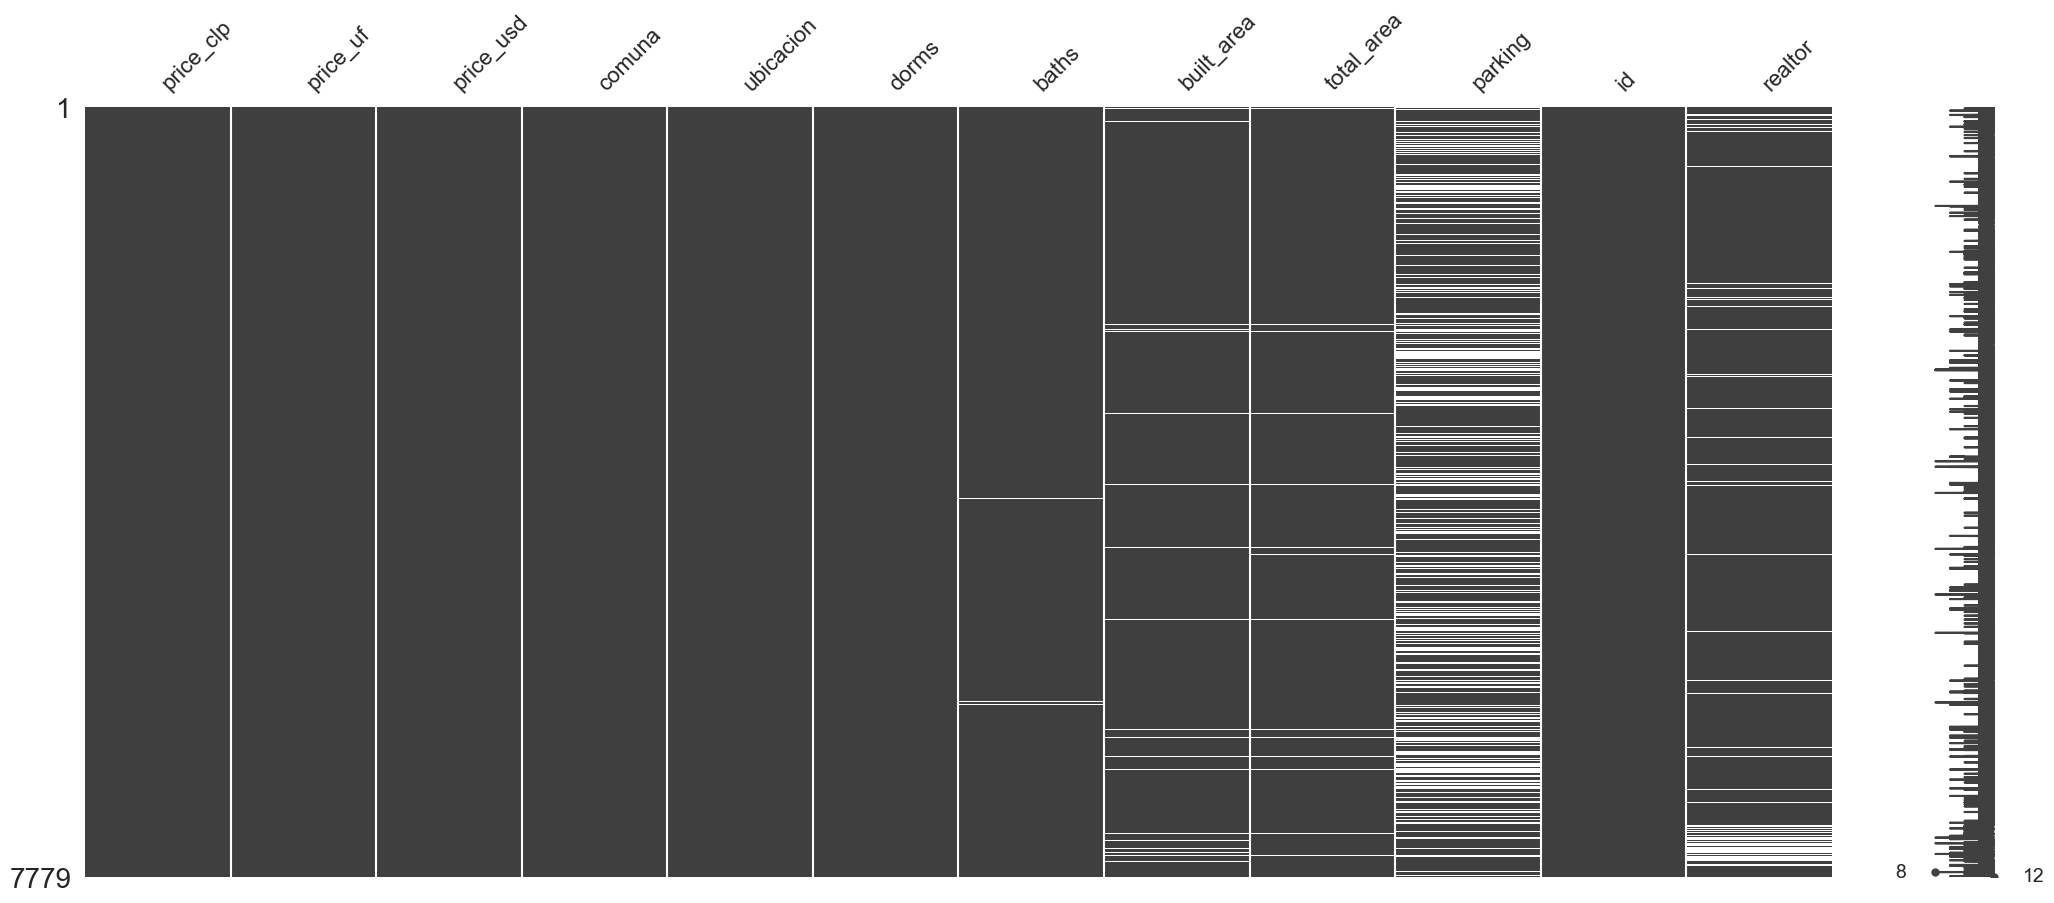

In [161]:
# Se visualiza los Nulos
msgn.matrix(df)

##### 4.3 Protocolo de acción con respecto a los Nulos
### **a) Parking**

In [163]:
df[df["parking"]==0] # Se busca las propiedades sin Parking

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id,realtor



**Decisión:** 

Dado que no se encontraron valores numéricos iguales a 0 en la característica "parking", se concluye que los valores NaN en esta misma característica pueden ser reemplazados por 0. 

**Justificación:** 
* La ausencia de ceros sugiere que NaN en este contexto indica la falta de datos o un valor no aplicable, que puede ser interpretado como una ausencia de la característica a la hora de realizar el web scraping.


In [165]:
df["parking"].fillna(0, inplace=True) # Se remplazan los NaNs de parking por 0

### **b) Realtor**

In [167]:
df.realtor.dtype

dtype('O')

**Decisión:** Se ha tomado la determinación de excluir la columna "realtor" del modelo de regresión lineal. 

**Justificación:**
* **Naturaleza categórica:** La variable "realtor" es de naturaleza categórica (nominal), lo cual dificulta su incorporación directa en un modelo de regresión lineal.
* **Valores faltantes:** La presencia significativa de valores NaN en esta columna podría afectar la precisión de las predicciones.
* **Irrelevancia para la predicción:** Se considera que la identidad del realtor no tiene una relación causal directa con la variable objetivo que se busca predecir en este análisis.

**Implicaciones:**
* Al eliminar esta columna, se simplifica el modelo y se reduce el riesgo de overfitting.
* Seria valido considerar si la información contenida en "realtor" podría ser relevante para otros análisis, como por ejemplo, un estudio exploratorio de los diferentes realtors, sus areas de trabajo o un modelo de clasificación.

In [169]:
df.drop("realtor", axis=1, inplace=True) # Se descarta la columna Realtor

### **c) Valores NaN que quedan:** baths (65), built_area (246), total_area (208)

**Decisión:** Se ha tomado la determinación de reemplazar los valores NaN restantes, pero normalizando con la mediana cada uno de ellos según valor total de la columna dorms y comuna.

**Justificación:**


**Implicaciones:**


Visualizamos la cantidad de casas que tienen 1 o más valores NaN en las columnas de baths, built_area, total_area

In [173]:
# Contar cuántos NaN hay en cada comuna (solo casas únicas que tienen al menos un NaN)
nan_by_comuna = df[df.isna().any(axis=1)].groupby('comuna').size().reset_index(name='casas_con_nan')

# Contar el total de casas por comuna
total_casas_por_comuna = df.groupby('comuna').size().reset_index(name='total_casas')

# Unir los dos resultados en un solo DataFrame
comparacion = pd.merge(total_casas_por_comuna, nan_by_comuna, on='comuna', how='left')

# Reemplazar NaN en 'casas_con_nan' con 0, en caso de que algunas comunas no tengan casas con NaN
comparacion['casas_con_nan'].fillna(0, inplace=True)

# Calcular el porcentaje de casas con valores NaN respecto al total de casas en cada comuna
comparacion['porcentaje_nan'] = (comparacion['casas_con_nan'] / comparacion['total_casas']) * 100

# Mostrar el resultado
print(comparacion)

               comuna  total_casas  casas_con_nan  porcentaje_nan
0                Buin          125            6.0        4.800000
1       CaleradeTango           22            1.0        4.545455
2           Cerrillos           64            4.0        6.250000
3          CerroNavia           53            8.0       15.094340
4              Colina          553           14.0        2.531646
5            Conchalí           48            5.0       10.416667
6            Curacaví           20            3.0       15.000000
7            ElBosque           91            5.0        5.494505
8             ElMonte           17            1.0        5.882353
9     EstaciónCentral          106            3.0        2.830189
10         Huechuraba          122            1.0        0.819672
11      Independencia           70            1.0        1.428571
12        IsladeMaipo           23            1.0        4.347826
13         LaCisterna           85            3.0        3.529412
14        

Hay algunos valores NaN que tienen un % considerable dentro del total de la comuna que podrían cambiar los datos si no los tomamos en cuenta. Por ejemplo en comunas: Cerro Navia, Conchalí, Curacaví, La Granja, Pirque y San Ramón (sobre 10%). 

Tenemos que tener cuidado para reemplazar por normalización según la media (ya que hay outliers) y también según la mediana, ya que no podemos comparar casas de 7 dorms con casas de 1 dorm. Entonces, lo que haremos es buscar la mediana para cada casa según comuna y según cantidad de dorms.

In [176]:
# Calcular la mediana por comuna y número de dormitorios para 'baths', 'built_area', y 'total_area'
medianas_por_comuna_dorms = df.groupby(['comuna', 'dorms'])[['baths', 'built_area', 'total_area']].median().reset_index()

# Mostrar la tabla con las medianas por comuna y número de dormitorios
print(medianas_por_comuna_dorms)

    comuna  dorms  baths  built_area  total_area
0     Buin      2    1.0        54.0        98.0
1     Buin      3    2.0        83.0       167.0
2     Buin      4    3.0       125.0       220.0
3     Buin      5    3.0       138.0       161.5
4     Buin      6    4.0       330.0      5000.0
..     ...    ...    ...         ...         ...
397  Ñuñoa      7    5.0       300.0       400.0
398  Ñuñoa      8    4.0       250.0       375.0
399  Ñuñoa     10    3.0       305.0       562.5
400  Ñuñoa     11    4.5       417.5       591.0
401  Ñuñoa     12    4.0       450.0       490.0

[402 rows x 5 columns]


In [177]:
# Verificar cuántos NaN quedan en las columnas baths, built_area, y total_area
nan_remaining = df[['baths', 'built_area', 'total_area']].isna().sum()

# Mostrar el resultado para identificar si hay NaN restantes
nan_remaining

baths          65
built_area    246
total_area    208
dtype: int64

In [178]:
# Calcular las medianas de baths, built_area, total_area por comuna y cantidad de dorms
medianas_por_comuna_dorms = df.groupby(['comuna', 'dorms'])[['baths', 'built_area', 'total_area']].median().reset_index()

# Reemplazar los valores NaN en el DataFrame original según la mediana de cada comuna y cantidad de dorms
for i, row in medianas_por_comuna_dorms.iterrows():
    # Crear la máscara para seleccionar las filas con NaN en 'baths', 'built_area', 'total_area' en la comuna y dorms específicos
    mask = (df['comuna'] == row['comuna']) & (df['dorms'] == row['dorms'])
    
    # Reemplazar NaN en 'baths'
    df.loc[mask & df['baths'].isna(), 'baths'] = row['baths']
    
    # Reemplazar NaN en 'built_area'
    df.loc[mask & df['built_area'].isna(), 'built_area'] = row['built_area']
    
    # Reemplazar NaN en 'total_area'
    df.loc[mask & df['total_area'].isna(), 'total_area'] = row['total_area']

# Verificar que los valores NaN hayan sido reemplazados
print(df[['baths', 'built_area', 'total_area']].isna().sum())

baths         5
built_area    1
total_area    1
dtype: int64


In [179]:
# Eliminar las filas donde hay valores NaN en 'baths', 'built_area', o 'total_area'
df_sin_nan = df.dropna(subset=['baths', 'built_area', 'total_area'])

# Verificar que ya no hay valores NaN en las columnas mencionadas
print(df_sin_nan[['baths', 'built_area', 'total_area']].isna().sum())


baths         0
built_area    0
total_area    0
dtype: int64


**Decisión:** Se decide eliminar los valores nulos restantes en esta etapa inicial del análisis.

**Justificación:**
* **Baja proporción:** La proporción de valores nulos es relativamente pequeña en comparación con el tamaño total del dataset. (0.8 al 3%)
* **Primera iteración:** En esta primera iteración, el objetivo es obtener un modelo inicial para luego realizar ajustes posteriores.
* **Impacto limitado:** Se considera que la eliminación de estos nulos tendrá un impacto limitado en la precisión y generalización del modelo.

**Consideraciones futuras:**
* En futuras iteraciones, se puede explorar métodos de imputación de valores nulos para mejorar la calidad del dataset y la robustez del modelo.

In [200]:
# Guardar el DataFrame sin valores NaN en un nuevo DataFrame
df_nuevo_normalizado = df_sin_nan.copy()

# Verificar que el nuevo DataFrame ha sido creado
print(f"El nuevo DataFrame tiene {df_nuevo.shape[0]} filas y {df_nuevo.shape[1]} columnas.")

# Si deseas guardarlo en un archivo Excel para futuras referencias
ruta_guardado = r'C:\Users\raval\Dropbox\Magister Data Science\2º TRIMESTRE\Análisis de Datos\Trabajo 1\Data\df_nuevo_normalizado.xlsx'
df_nuevo_normalizado.to_excel(ruta_guardado, index=False)

print(f"Archivo guardado en: {ruta_guardado}")

NameError: name 'df_nuevo' is not defined

In [776]:
#df.dropna(inplace=True) #se descarta el resto de los Nans

In [202]:
df.isna().sum()/df.shape[0]*100 # Se calcula el % de los datos que quedan nulos

price_clp     0.000000
price_uf      0.000000
price_usd     0.000000
comuna        0.000000
ubicacion     0.000000
dorms         0.000000
baths         0.064276
built_area    0.012855
total_area    0.012855
parking       0.000000
id            0.000000
dtype: float64

In [204]:
# Cargar el archivo Excel proporcionado
ruta_archivo_excel = r'./data/df_nuevo_normalizado.xlsx'
df_nuevo = pd.read_excel(ruta_archivo_excel)

# Mostrar las primeras filas del DataFrame para verificar que el archivo se ha cargado correctamente
df_nuevo.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3,11700213
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1,10894299
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2,10257635
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1,9232092
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1,7085397


<Axes: >

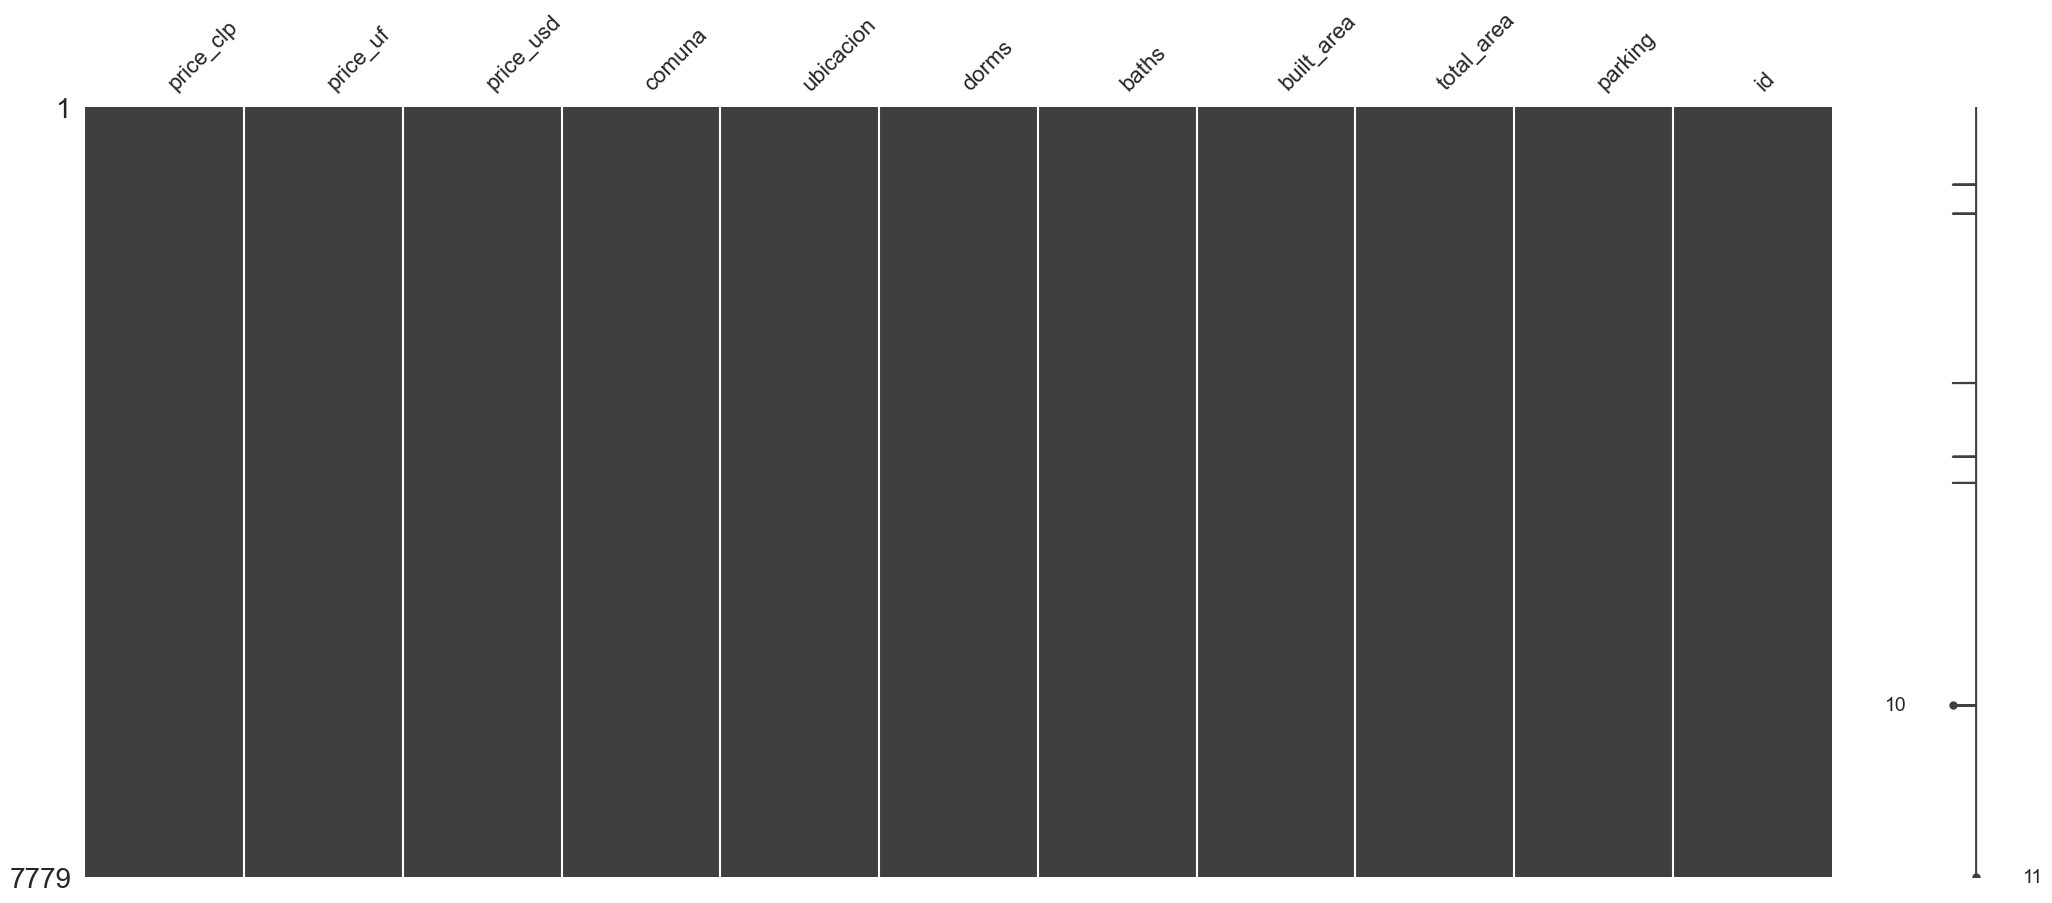

In [206]:
msgn.matrix(df)

##### 4.4 Distinción de Tipos

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_clp   7779 non-null   int64  
 1   price_uf    7779 non-null   int64  
 2   price_usd   7779 non-null   int64  
 3   comuna      7779 non-null   object 
 4   ubicacion   7779 non-null   object 
 5   dorms       7779 non-null   int64  
 6   baths       7774 non-null   float64
 7   built_area  7778 non-null   float64
 8   total_area  7778 non-null   float64
 9   parking     7779 non-null   float64
 10  id          7779 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 668.6+ KB


|Variable|	Tipo|	Descripción|
|---|---|---|
|price_clp|	Numérico (entero)|	Precio en pesos chilenos|
|price_uf|	Numérico (entero)|	Precio en Unidades de Fomento|
price_usd|	Numérico (entero)|	Precio en dólares estadounidenses|
|dorms|	Numérico (entero)|	Número de dormitorios|
|baths|	Numérico (flotante)|	Número de baños|
|built_area|	Numérico (flotante)|	Área construida (m²)|
|total_area|	Numérico (flotante)|	Área total (m²)|
|parking|	Numérico (flotante)|	Número de estacionamientos|
|id|	Categórico Numérico|	Identificador único interno|
|comuna|	Categórico|	Nombre de la comuna|
|ubicacion|	Categórico|	Ubicación específica|

##### 4.5 Busqueda y manejo de duplicados

In [808]:
# Verificar datos duplicados
duplicados = df.duplicated().sum()

# Porcentaje de data duplicada
porcentaje = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicados} el numero de filas duplicadas representa {porcentaje.round(2)}% del total de la data.')

1 el numero de filas duplicadas representa 0.01% del total de la data.


In [810]:
# Borramos dato duplicado y creamos un nuevo df1
df1 = df.drop_duplicates(keep='first').copy()
df1.drop("id",axis=1, inplace=True)
# Mostramos las primeras filas del df1
df1.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0


##### 4.6 Normalización

In [813]:
# Se selecciona las columnas numéricas
num_columns = df1.select_dtypes(include=np.number)

# Se normaliza los valores usando min-max scaling
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(num_columns)

# Se crea df con datos normalizados
df1_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
df1_normalized.head(10)

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking
0,0.074193,0.074194,0.074193,0.230769,0.107143,0.003192,0.001078,0.002364
1,0.019034,0.019032,0.019034,0.038462,0.000000,0.000925,0.000212,0.000788
2,0.023225,0.023226,0.023225,0.076923,0.000000,0.000483,0.000357,0.001576
3,0.013595,0.013594,0.013595,0.076923,0.000000,0.000850,0.000106,0.000788
4,0.009607,0.009606,0.009607,0.038462,0.000000,0.000467,0.000097,0.000788
5,0.017040,0.017039,0.017040,0.038462,0.000000,0.000592,0.000192,0.000000
6,0.013595,0.013594,0.013595,0.076923,0.000000,0.000575,0.000117,0.001576
7,0.019034,0.019032,0.019034,0.038462,0.000000,0.000408,0.000176,0.000788
8,0.013777,0.013774,0.013777,0.076923,0.000000,0.000592,0.000105,0.000788
9,0.013777,0.013774,0.013777,0.076923,0.000000,0.000375,0.000131,0.000788


##### 4.7 Estandarización

In [816]:
# Estandarizamos la data
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(num_columns) # num_columns es las columnas numericas de df1

# Crear df con datos normalizados
df1_std = pd.DataFrame(std_data, columns=num_columns.columns)
df1_std.head(10)

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking
0,0.116378,0.116378,0.116379,1.852277,0.922989,0.095310,-0.007120,0.059900
1,-0.670133,-0.670159,-0.670132,-1.228778,-1.127130,-0.069464,-0.072846,-0.073692
2,-0.610362,-0.610363,-0.610362,-0.612567,-1.127130,-0.101570,-0.061873,-0.006896
3,-0.747676,-0.747708,-0.747676,-0.612567,-1.127130,-0.074916,-0.080908,-0.073692
4,-0.804542,-0.804560,-0.804543,-1.228778,-1.127130,-0.102782,-0.081580,-0.073692
5,-0.698566,-0.698584,-0.698566,-1.228778,-1.127130,-0.093695,-0.074414,-0.140487
6,-0.747676,-0.747708,-0.747676,-0.612567,-1.127130,-0.094907,-0.080124,-0.006896
7,-0.670133,-0.670159,-0.670132,-1.228778,-1.127130,-0.107022,-0.075646,-0.073692
8,-0.745092,-0.745132,-0.745092,-0.612567,-1.127130,-0.093695,-0.081020,-0.073692
9,-0.745092,-0.745132,-0.745092,-0.612567,-1.127130,-0.109445,-0.079005,-0.073692


##### 4.8 Ingenieria de columnas

**Decisión:** Será de poco uso considerar las 3 monedas para analizar, por lo que solo se utilizará la UF para Ingeniería de columnas.

In [820]:
df2=df1.copy()
df2["price_built_m2_uf"] = df2["price_uf"]/df2["built_area"] 
df2["price_total_m2_uf"] = df2["price_uf"]/df2["total_area"]
df2["price_parking_uf"] = df2["price_uf"]/df2["parking"]
df2["price_dorms_uf"] = df2["price_uf"]/df2["dorms"]
df2["price_baths_uf"] = df2["price_uf"]/df2["baths"]

* **price_built_m2_uf**  
    - Descripción: Precio por metro cuadrado construido en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área construida.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área construida, lo que puede ser útil para comparar propiedades de diferentes tamaños.

* **price_total_m2_uf**  
    - Descripción: Precio por metro cuadrado total en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área total.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área total, incluyendo áreas comunes como estacionamientos y jardines.  

* **price_parking_uf**  
    - Descripción: Precio por estacionamiento en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de estacionamientos.  
    - Significado: Esta variable proporciona una medida del valor de cada estacionamiento en la propiedad.  

* **price_dorms_uf**  
    - Descripción: Precio por dormitorio en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de dormitorios.  
    - Significado: Esta variable proporciona una medida del valor de cada dormitorio en la propiedad.  

* **price_baths_uf**  
    - Descripción: Precio por baño en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de baños.  
    - Significado: Esta variable proporciona una medida del valor de cada baño en la propiedad.  

In [823]:
df2.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,price_built_m2_uf,price_total_m2_uf,price_parking_uf,price_dorms_uf,price_baths_uf
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,29.947917,15.710383,3833.333333,1642.857143,2875.0
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,26.339286,20.344828,2950.000000,1475.000000,2950.0
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,61.016949,14.814815,1800.000000,1200.000000,3600.0
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,20.456311,28.863014,2107.000000,702.333333,2107.0
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,26.122807,22.223881,1489.000000,744.500000,1489.0


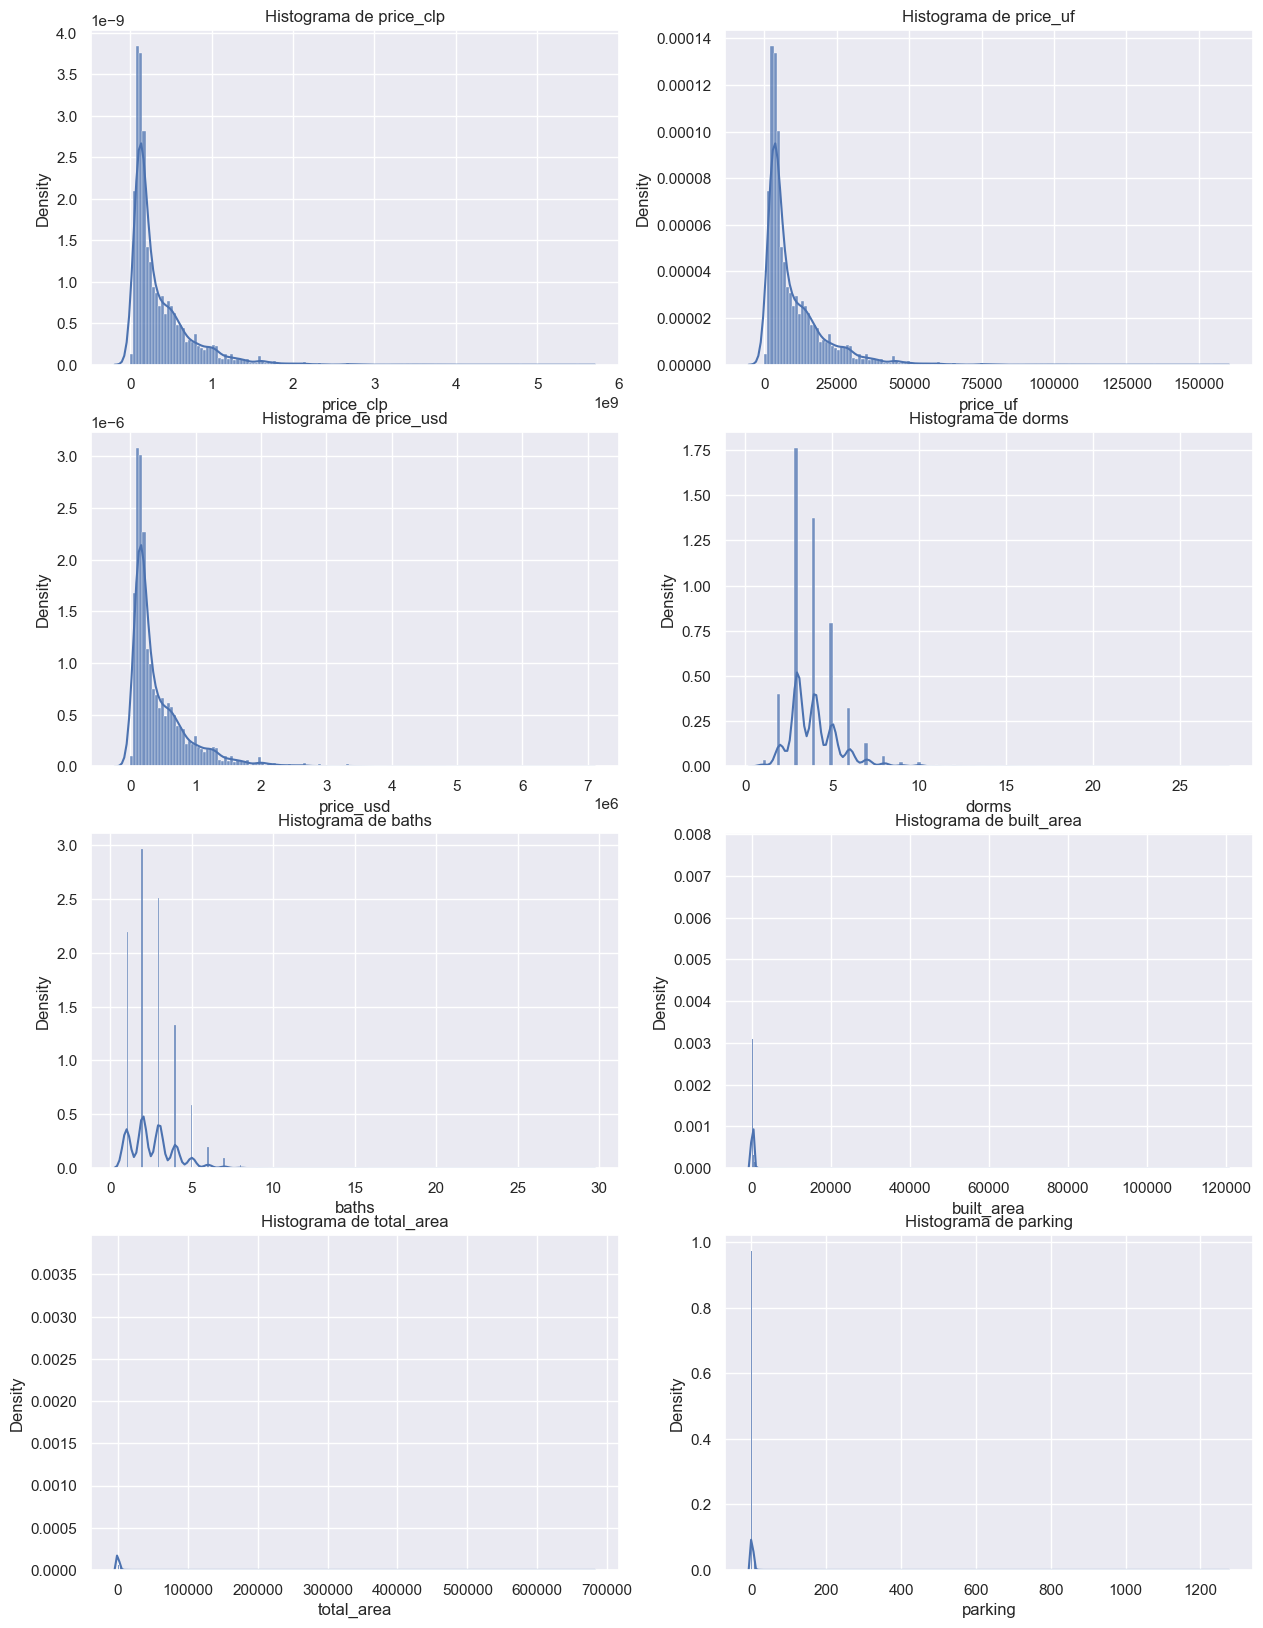

In [825]:
# Definir el tamaño de la figura
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15, 20), squeeze=False)  # Crear una cuadrícula de gráficos (4 filas, 2 columnas)
# Iterar sobre cada columna numérica para crear Histograma
for ax, column in zip(axs.flat, num_columns.columns):
    
    sns.histplot(num_columns[column],ax=ax, stat="density") #si les va muy lento borrar stat="density" y poner bins=40 o algo asi
    sns.kdeplot(num_columns[column],ax=ax)
    ax.set_title(f'Histograma de {column}')

# Ajustar el espacio entre los gráficos
plt.tight_layout
plt.show()


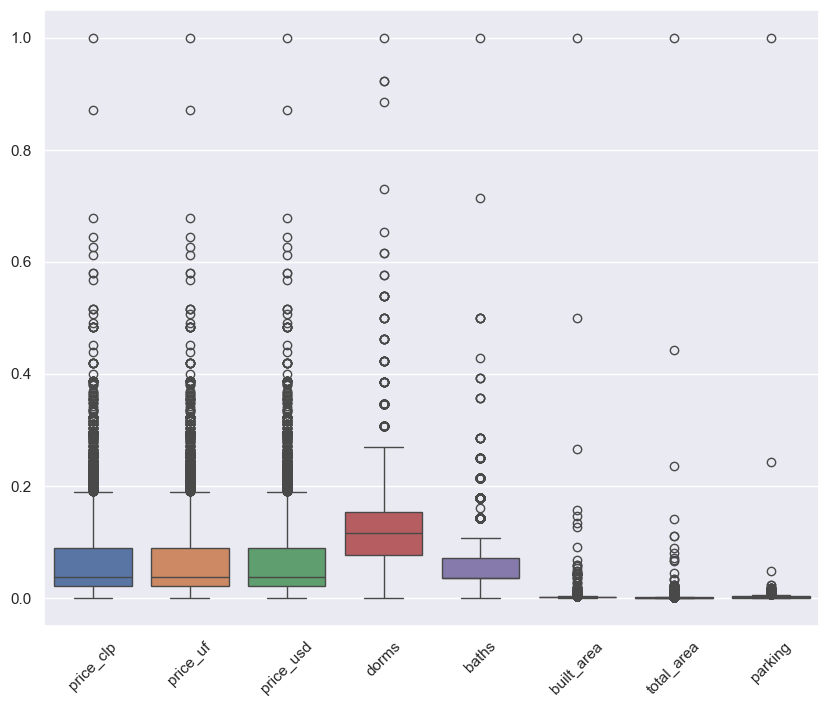

In [827]:
# Crear un boxplot para visualizar posibles Outliers

plt.figure(figsize=(10,8))
sns.boxplot(data= df1_normalized)
plt.xticks(rotation=45)


plt.show()

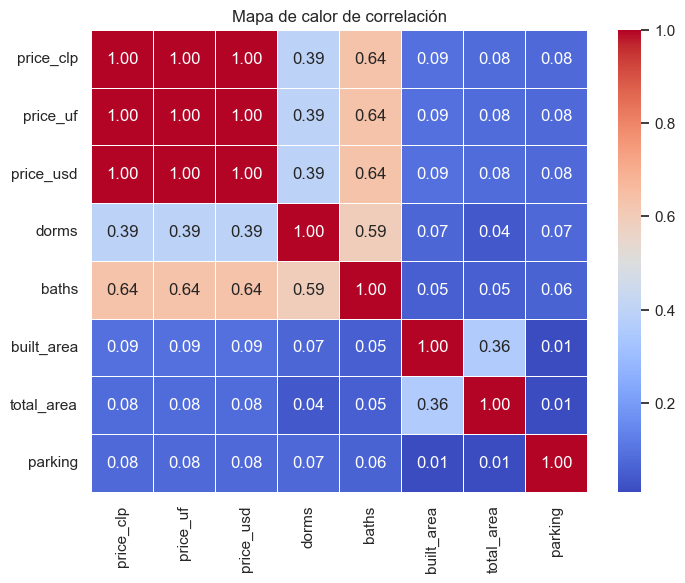

In [829]:
# Calcular la matriz de correlación
correlation_matrix = num_columns.corr(numeric_only=True)

# Crear un mapa de calor para mostrar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

* **price_built_m2_uf**  
    - Descripción: Precio por metro cuadrado construido en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área construida.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área construida, lo que puede ser útil para comparar propiedades de diferentes tamaños.

* **price_total_m2_uf**  
    - Descripción: Precio por metro cuadrado total en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área total.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área total, incluyendo áreas comunes como estacionamientos y jardines.  

* **price_parking_uf**  
    - Descripción: Precio por estacionamiento en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de estacionamientos.  
    - Significado: Esta variable proporciona una medida del valor de cada estacionamiento en la propiedad.  

* **price_dorms_uf**  
    - Descripción: Precio por dormitorio en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de dormitorios.  
    - Significado: Esta variable proporciona una medida del valor de cada dormitorio en la propiedad.  

* **price_baths_uf**  
    - Descripción: Precio por baño en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de baños.  
    - Significado: Esta variable proporciona una medida del valor de cada baño en la propiedad.  

In [ ]:
df2.head()

In [ ]:

# Definir el tamaño de la figura
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15, 20), squeeze=False)  # Crear una cuadrícula de gráficos (4 filas, 2 columnas)
# Iterar sobre cada columna numérica para crear Histograma
for ax, column in zip(axs.flat, num_columns.columns):
    
    sns.histplot(num_columns[column],ax=ax, stat="density") #si les va muy lento borrar stat="density" y poner bins=40 o algo asi
    sns.kdeplot(num_columns[column],ax=ax)
    ax.set_title(f'Histograma de {column}')

# Ajustar el espacio entre los gráficos
plt.tight_layout
plt.show()


In [ ]:
# Crear un boxplot para visualizar posibles Outliers

plt.figure(figsize=(10,8))
sns.boxplot(data= df1_normalized)
plt.xticks(rotation=45)


plt.show()

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = num_columns.corr(numeric_only=True)

# Crear un mapa de calor para mostrar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()